Santiago Cruz - Juan Pacheco

In [ ]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

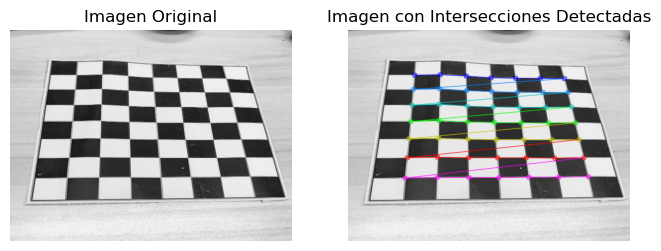

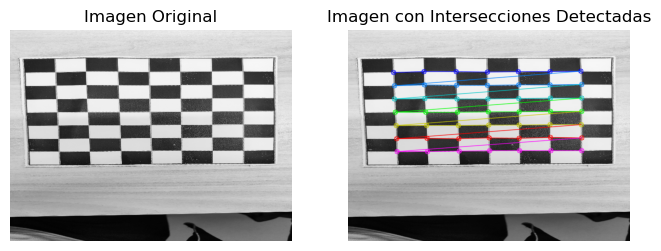

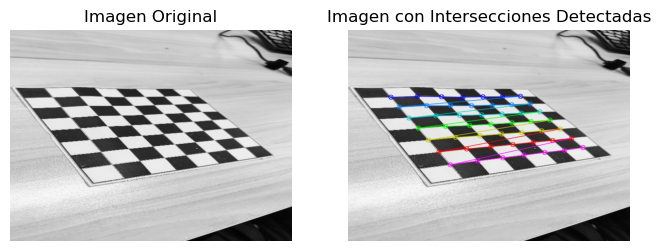

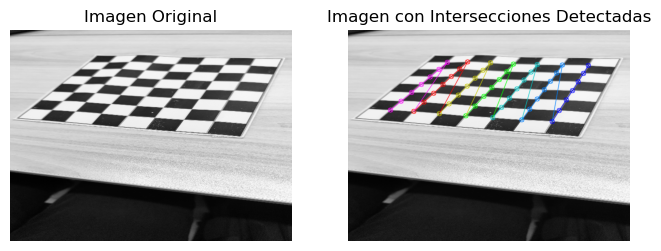

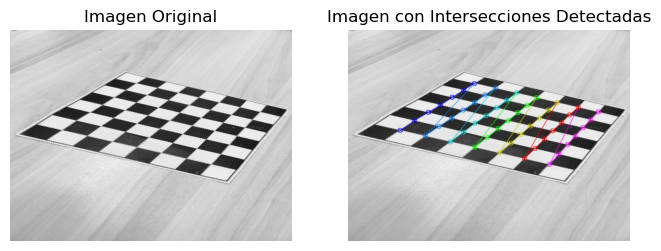

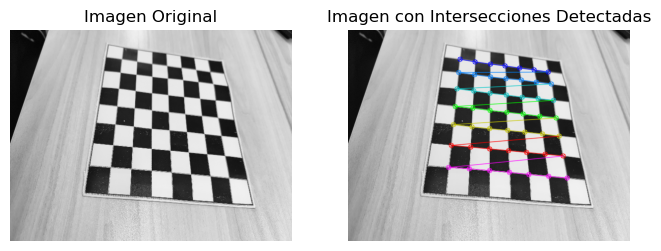

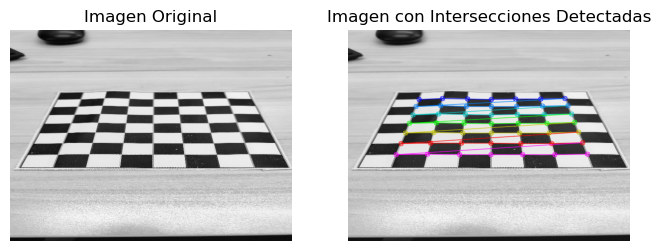

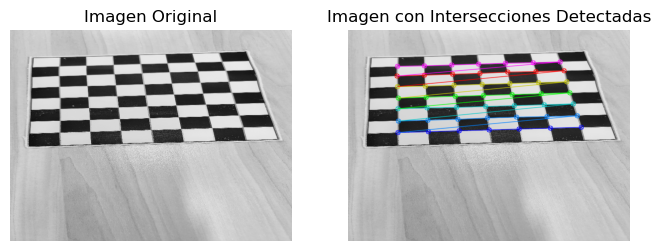

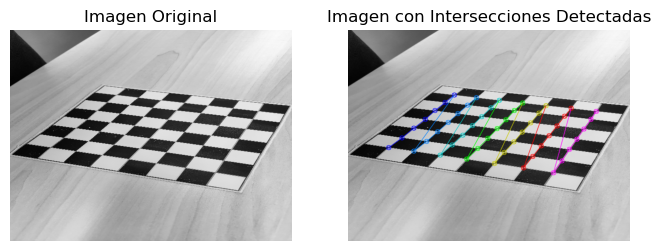

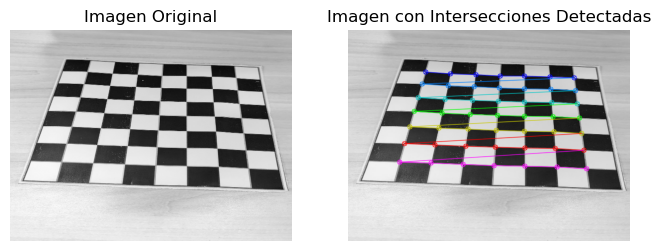

In [ ]:
# Definir las dimensiones del tablero de ajedrez
CHECKERBOARD = (7, 7) #Cantidad de intersecciones dentro del tablero de ajedrez
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Crear vectores para almacenar los puntos 3D y 2D para cada imagen del tablero de ajedrez
objpoints = []
imgpoints = []

# Definir las coordenadas del mundo para los puntos 3D
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# Extraer la ruta de cada imagen almacenada en un directorio dado
images = glob.glob('./images/*.jpeg')
for fname in images:
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (640, 480))
    # Encontrar las esquinas del tablero de ajedrez
    ret, corners = cv2.findChessboardCorners(img, CHECKERBOARD, None)
    
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(img, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        img_puntos = cv2.drawChessboardCorners(img_color, CHECKERBOARD, corners2, ret)
        
        fig, ax = plt.subplots(1, 2, figsize=(8, 4))  # Dos subgráficas
        ax[0].imshow(img, cmap="gray")
        ax[0].set_title("Imagen Original")
        ax[0].axis("off")

        ax[1].imshow(img_puntos, cmap="gray")
        ax[1].set_title("Imagen con Intersecciones Detectadas")
        ax[1].axis("off")
        plt.show()

cv2.destroyAllWindows()

In [2]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[::-1], None, None)

print("Matriz de la cámara:\n", mtx)

Matriz de la cámara:
 [[2.56328312e+03 0.00000000e+00 5.16460585e+02]
 [0.00000000e+00 1.35537282e+03 2.10701845e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [3]:
print("Coeficientes de distorsión:\n", dist)

Coeficientes de distorsión:
 [[ 6.84170698e+00 -1.78350113e+02  3.84785875e-01  2.64915886e-01
   2.34988012e+03]]


In [4]:
print("Vectores de rotación:\n", rvecs)

Vectores de rotación:
 (array([[-0.32054429],
       [-0.60284757],
       [-0.02619823]]), array([[0.68304288],
       [0.09519096],
       [0.02266408]]), array([[-0.73240967],
       [-0.63283344],
       [-0.31524903]]), array([[-0.61807059],
       [ 0.69364624],
       [ 1.67753492]]), array([[-0.54014851],
       [-0.71805093],
       [-1.03583124]]), array([[-0.21288998],
       [-1.10095442],
       [ 0.02849063]]), array([[-0.92546121],
       [-0.17550641],
       [-0.02113924]]), array([[-0.37280237],
       [ 1.02592241],
       [ 2.85059738]]), array([[-0.63908543],
       [-0.67098567],
       [-1.16405068]]), array([[-0.38755116],
       [-0.42815298],
       [ 0.03749327]]))


In [5]:
print("Vectores de traslación:\n", tvecs)

Vectores de traslación:
 (array([[-5.36224728],
       [-3.18900649],
       [33.73527221]]), array([[-5.82551982],
       [-3.24964272],
       [32.8093311 ]]), array([[-7.03073531],
       [-2.00522408],
       [41.58761356]]), array([[ 0.36327732],
       [-4.11718136],
       [41.82239824]]), array([[-6.36620313],
       [ 0.20552264],
       [40.83770508]]), array([[-3.6232679 ],
       [-3.9126091 ],
       [30.12630282]]), array([[-6.23788738],
       [-2.03528381],
       [41.17050464]]), array([[ 0.21733126],
       [ 0.3695901 ],
       [35.58244142]]), array([[-6.5032015 ],
       [ 1.29630621],
       [38.92661729]]), array([[-5.48667997],
       [-3.67672015],
       [36.55029024]]))
